<a href="https://colab.research.google.com/github/linyuehzzz/census_privacy/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####**Spatial reidentification risks**

In [89]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/reid_risk.csv')
## Franklin, block level
df_f_blk = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "blk")]
df_f_blk = df_f_blk.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Franklin, block group level
df_f_bg = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "bg")]
df_f_bg = df_f_bg.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Franklin, tract level
df_f_tr = df[(df["county"] == "Franklin") & (df["aggregation.level"] == "tr")]
df_f_tr = df_f_tr.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, tract level
df_g_blk = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "blk")]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, block group level
df_g_bg = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "bg")]
df_g_bg = df_g_bg.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')

## Guernsey, tract level
df_g_tr = df[(df["county"] == "Guernsey") & (df["aggregation.level"] == "tr")]
df_g_tr = df_g_tr.pivot_table(index='plb', columns=['risk.type', 'qid'], values='risk.value')
df_g_tr

/content/gdrive/My Drive/Colab Notebooks/census_privacy


risk.type    ppv                tpr            
qid            1      2    3      1      2    3
plb                                            
0.01       0.000  0.000  0.0  0.000  0.000  0.0
0.10       0.000  0.000  0.0  0.000  0.000  0.0
1.60       0.031  0.059  0.0  0.016  0.024  0.0
10.00      0.119  0.186  0.0  0.129  0.190  0.0
100.00     0.212  0.128  0.0  0.226  0.143  0.0

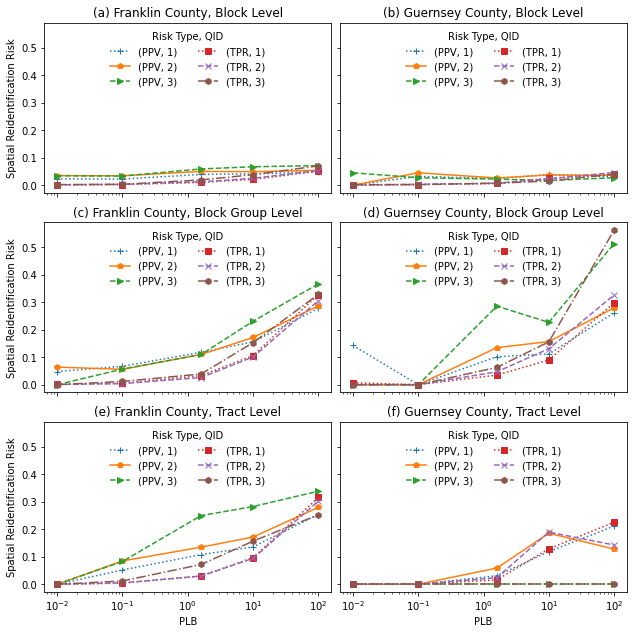

In [131]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize = (10,10))

## Franklin, block level
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[0, 0])
ax.set_xscale('log')
ax.legend(title='Risk Type, QID', labels=['(PPV, 1)', '(PPV, 2)', '(PPV, 3)', '(TPR, 1)', '(TPR, 2)', '(TPR, 3)'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(a) Franklin County, Block Level")

## Franklin, block group level
ax = df_f_bg.plot(xticks=df_f_bg.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[1, 0])
ax.set_xscale('log')
ax.legend(title='Risk Type, QID', labels=['(PPV, 1)', '(PPV, 2)', '(PPV, 3)', '(TPR, 1)', '(TPR, 2)', '(TPR, 3)'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(c) Franklin County, Block Group Level")

## Franklin, tract level
ax = df_f_tr.plot(xticks=df_f_tr.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[2, 0])
ax.set_xscale('log')
ax.legend(title='Risk Type, QID', labels=['(PPV, 1)', '(PPV, 2)', '(PPV, 3)', '(TPR, 1)', '(TPR, 2)', '(TPR, 3)'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(e) Franklin County, Tract Level")

## Guernsey, block level
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[0, 1])
ax.set_xscale('log')
ax.legend(title='Risk Type, QID', labels=['(PPV, 1)', '(PPV, 2)', '(PPV, 3)', '(TPR, 1)', '(TPR, 2)', '(TPR, 3)'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(b) Guernsey County, Block Level")

## Guernsey, block group level
ax = df_g_bg.plot(xticks=df_g_bg.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[1, 1])
ax.set_xscale('log')
ax.legend(title='Risk Type, QID', labels=['(PPV, 1)', '(PPV, 2)', '(PPV, 3)', '(TPR, 1)', '(TPR, 2)', '(TPR, 3)'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(d) Guernsey County, Block Group Level")

## Guernsey, tract level
ax = df_g_tr.plot(xticks=df_g_tr.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Spatial Reidentification Risk', ax=axes[2, 1])
ax.set_xscale('log')
ax.legend(title='Risk Type, QID', labels=['(PPV, 1)', '(PPV, 2)', '(PPV, 3)', '(TPR, 1)', '(TPR, 2)', '(TPR, 3)'], 
          frameon=False, loc='upper center', ncol=2)
ax.set_title("(f) Guernsey County, Tract Level")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/reid_risk.eps', format='eps')

####**Reconstruction risks**

In [143]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

df = pd.read_csv('data/tables/recon_risk.csv')

## Franklin, block level
df_f_blk = df[df["county"] == "Franklin"]
df_f_blk = df_f_blk.pivot_table(index='plb', columns='aggregation.level', values='risk.value')
df_f_blk = df_f_blk[['blk','bg', 'tr']]

## Guernsey, tract level
df_g_blk = df[df["county"] == "Guernsey"]
df_g_blk = df_g_blk.pivot_table(index='plb', columns=['aggregation.level'], values='risk.value')
df_g_blk = df_g_blk[['blk','bg', 'tr']]

df_g_blk

/content/gdrive/My Drive/Colab Notebooks/census_privacy


aggregation.level,blk,bg,tr
plb,,,
0.01,0.039,0.776,0.896
0.10,0.063,0.892,0.938
1.60,0.117,0.952,0.972
10.00,0.145,0.969,0.981
100.00,0.165,0.988,0.993


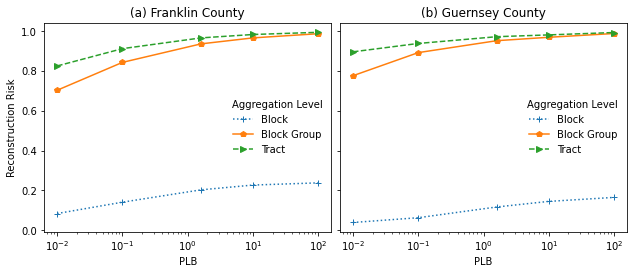

In [151]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (10,5))

## Franklin, block level
ax = df_f_blk.plot(xticks=df_f_blk.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Reconstruction Risk', ax=axes[0])
ax.set_xscale('log')
ax.legend(title='Aggregation Level', labels=['Block', 'Block Group', 'Tract'], frameon=False, loc='right', ncol=1)
ax.set_title("(a) Franklin County")

## Guernsey, block level
ax = df_g_blk.plot(xticks=df_g_blk.index, style=['+:','p-','>--','s:','x--','h-.'], xlabel='PLB', ylabel='Reconstruction Risk', ax=axes[1])
ax.set_xscale('log')
ax.legend(title='Aggregation Level', labels=['Block', 'Block Group', 'Tract'], frameon=False, loc='right', ncol=1)
ax.set_title("(b) Guernsey County")

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)
plt.savefig('data/tables/recon_risk.eps', format='eps')